# Performance testing results

We provide benchmarks for the prediction and recommendation endpoints for different algorithms using our reference machine of four workers sending 1000 requests to the recommendation server. The results for each algorithm are detailed below.

## Setup

In [1]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ConfigReader:
    def get_value(self, key):
        with open('config.json') as json_data_file:
            data = json.load(json_data_file)
        return data[key]

In [5]:
results_folder = "results/"

def print_stats_from_file(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))  
    times = obj['times']
    time_taken_all = obj['time_taken_all']
    num_requests = obj['num_requests']
    print(f'Number of requests: {num_requests}')    
    print(f'Total response time: {round(time_taken_all, 3)}')
    print(f'Throughput (requests per second): {round(num_requests / time_taken_all, 3)}')
    print(f'Peak response time: {round(max(times), 3)}')
    print(f'Mean response time: {round(np.mean(times), 3)}')
    print(f'99 percentile: {round(np.quantile(times, 0.99), 3)}')    
    
def plot_numbers(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))
    resp_time_per_request = obj['times']
    plt.plot(resp_time_per_request)
    plt.show()
    
def hist_numbers(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    resp_time_per_request = obj['times']
    plt.hist(resp_time_per_request, bins='auto')
    plt.title('Number of requests over time')
    plt.xlabel('Time')
    plt.ylabel('Requests')
    plt.show()

## Show results

### Get config values

In [6]:
reader = ConfigReader()
n_rand_users = num_requests = reader.get_value("num_requests")
base_url = reader.get_value("rec_server_base_url")
n_recs = reader.get_value("n_recs")
items = reader.get_value("items")
pred_algos = reader.get_value("pred_algos")
rec_algos = reader.get_value("rec_algos")
lk_recserver_algos = reader.get_value('lk_recserver_algos')
linear_speedup_algos = reader.get_value("linear_speedup_algos")
workers_config = reader.get_value("workers_config")

### Predict and recommend endpoints from server for canonical config

#### Predictions for different algorithms

Algorithm: bias
Number of requests: 1000
Total response time: 9.496
Throughput (requests per second): 105.305
Peak response time: 0.097
Mean response time: 0.075
99 percentile: 0.091


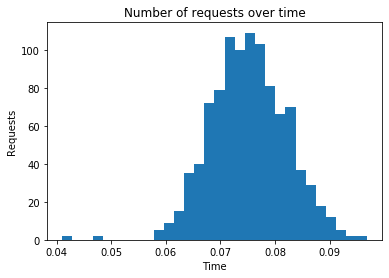

---------------------

Algorithm: itemitem
Number of requests: 1000
Total response time: 66.933
Throughput (requests per second): 14.94
Peak response time: 11.323
Mean response time: 0.534
99 percentile: 2.614


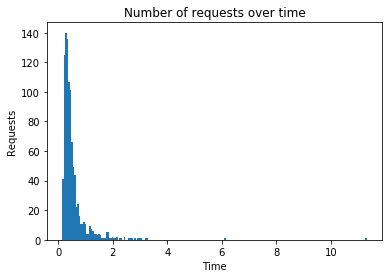

---------------------

Algorithm: useruser
Number of requests: 1000
Total response time: 25.493
Throughput (requests per second): 39.227
Peak response time: 0.245
Mean response time: 0.203
99 percentile: 0.232


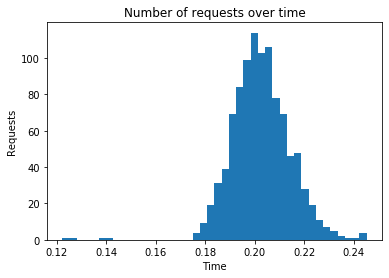

---------------------

Algorithm: biasedmf
Number of requests: 1000
Total response time: 9.438
Throughput (requests per second): 105.954
Peak response time: 0.302
Mean response time: 0.075
99 percentile: 0.095


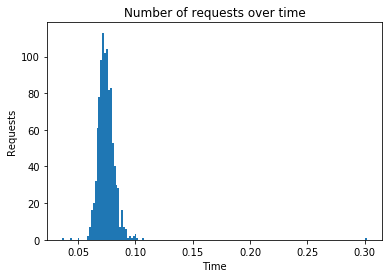

---------------------

Algorithm: implicitmf
Number of requests: 1000
Total response time: 9.341
Throughput (requests per second): 107.054
Peak response time: 0.096
Mean response time: 0.074
99 percentile: 0.09


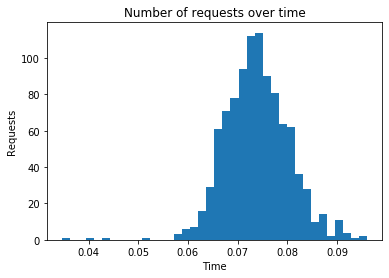

---------------------

Algorithm: funksvd
Number of requests: 1000
Total response time: 9.357
Throughput (requests per second): 106.869
Peak response time: 0.098
Mean response time: 0.074
99 percentile: 0.091


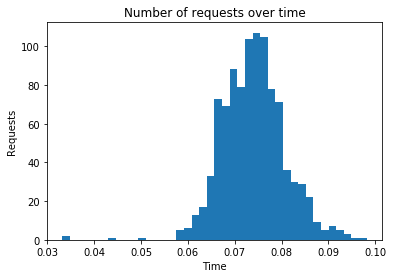

---------------------

Algorithm: tf_bpr
Number of requests: 1000
Total response time: 21.599
Throughput (requests per second): 46.298
Peak response time: 0.335
Mean response time: 0.172
99 percentile: 0.209


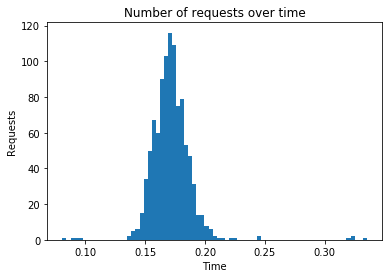

---------------------



In [7]:
for algo in pred_algos:
    print(f'Algorithm: {algo}')
    file_name = f'preds_{algo}_workers_4_num_req_{num_requests}.pickle'  
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('---------------------')
    print('')

#### Recommendations

Algorithm: popular
Number of requests: 1000
Total response time: 0.963
Throughput (requests per second): 1038.776
Peak response time: 0.076
Mean response time: 0.007
99 percentile: 0.009


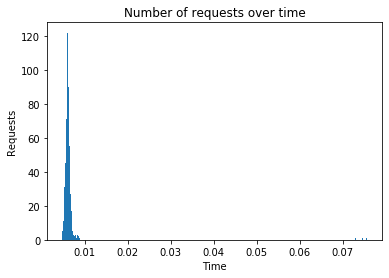

---------------------



In [8]:
for algo_rec in rec_algos:
    print(f'Algorithm: {algo_rec}')
    file_name = f'recs_{algo_rec}_workers_4_num_req_{num_requests}.pickle'
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('---------------------')
    print('')

### Lenskit

Algo: bias
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 0.56
Throughput (requests per second): 1786.832
Peak response time: 0.007
Mean response time: 0.0
99 percentile: 0.001


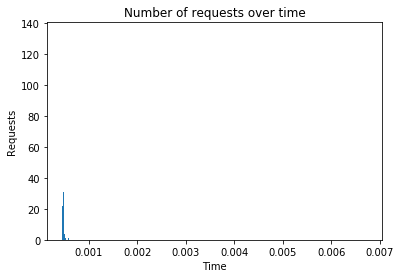

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 9.796
Throughput (requests per second): 102.087
Peak response time: 0.161
Mean response time: 0.078
99 percentile: 0.108


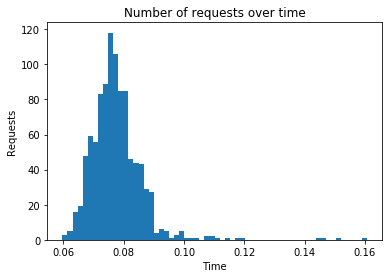

*******************************************************
Algo: biasedmf
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 0.411
Throughput (requests per second): 2434.898
Peak response time: 0.006
Mean response time: 0.0
99 percentile: 0.0


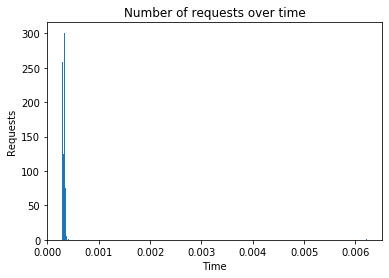

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 10.431
Throughput (requests per second): 95.865
Peak response time: 0.832
Mean response time: 0.083
99 percentile: 0.133


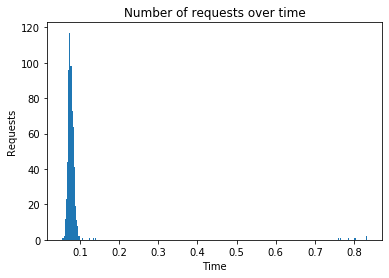

*******************************************************
Algo: itemitem
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 114.358
Throughput (requests per second): 8.744
Peak response time: 1.874
Mean response time: 0.114
99 percentile: 0.783


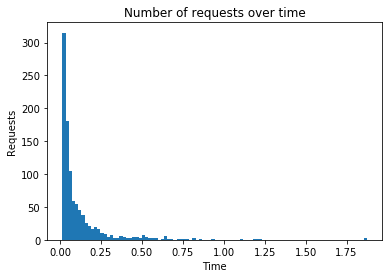

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 163.077
Throughput (requests per second): 6.132
Peak response time: 47.795
Mean response time: 1.297
99 percentile: 14.543


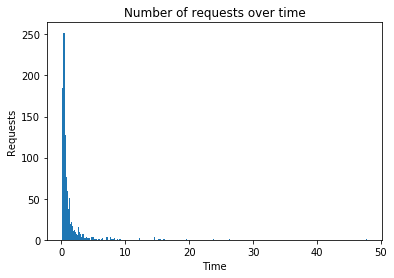

*******************************************************
Algo: tf_bpr
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 29.884
Throughput (requests per second): 33.463
Peak response time: 2.477
Mean response time: 0.03
99 percentile: 0.033


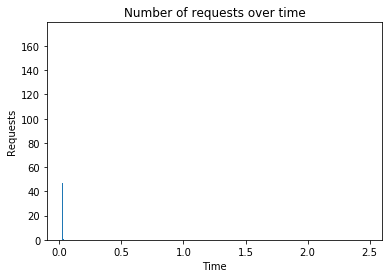

------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 26.769
Throughput (requests per second): 37.356
Peak response time: 4.912
Mean response time: 0.213
99 percentile: 0.312


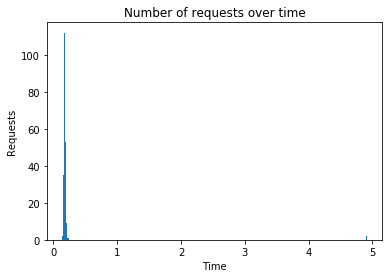

*******************************************************


In [9]:
for lk_recserver_algo in lk_recserver_algos:
    print(f'Algo: {lk_recserver_algo}')
    print('------------------')    
    print('Lenskit performance:')
    file_name = f'lkpy_{lk_recserver_algo}_num_req_{num_requests}.pickle'    
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('------------------')    
    print('Recommendation server performance:')
    file_name = f'preds_{lk_recserver_algo}_against_lkpy_workers_4_num_req_{num_requests}.pickle'
    print_stats_from_file(file_name)
    hist_numbers(file_name)
    print('*******************************************************')    

### Speedup Tests

#### Throughput by number of workers

Algo: biasedmf


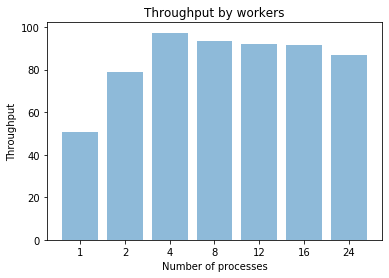

*******************************************************
Algo: itemitem


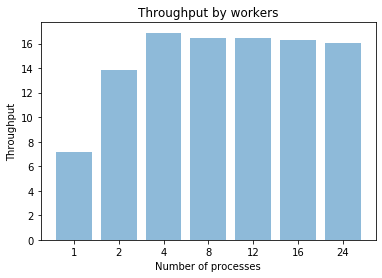

*******************************************************
Algo: tf_bpr


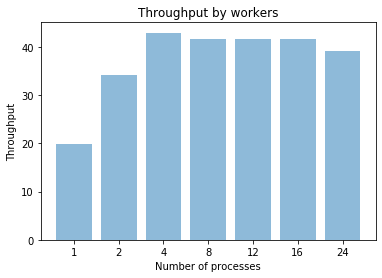

*******************************************************


In [11]:
for algo in linear_speedup_algos:
    print(f'Algo: {algo}')    
    throughput_file_name_workers = f'{results_folder}throughput_single_multiple_workers_algo_{algo}.csv'
    throughputs_workers_from_file = np.genfromtxt(throughput_file_name_workers, delimiter=',')
    y_pos = np.arange(len(throughputs_workers_from_file))

    plt.bar(y_pos, throughputs_workers_from_file, align='center', alpha=0.5)
    plt.xticks(y_pos, workers_config)
    plt.ylabel('Throughput')
    plt.xlabel('Number of processes')
    plt.title('Throughput by workers')

    plt.show()
    print('*******************************************************')
    